## Import Libraries

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import pickle
import os
import download
from dataset import one_hot_encoded
import cifar10
from tensorflow.keras import Sequential
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

## Download and Extract Cifar-10

In [2]:
cifar10.data_path = "data/CIFAR-10/"
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [3]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [35]:
X_train, cls_train, Y_train = cifar10.load_training_data()
X_test, cls_test, Y_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


## First 9 Images

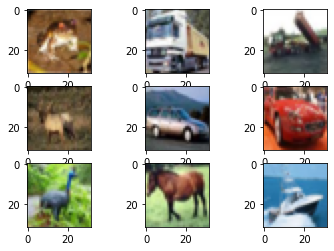

In [44]:
for i in range(9):
    # define subplot(3 rows 3 columns index)
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i])
# show the figure
plt.show()

## Normalize Images

In [5]:
# convert from integers to floats
train_norm = X_train.astype('float32')
test_norm = X_test.astype('float32')
# normalize to range 0-1
X_train = train_norm / 255.0
X_test = test_norm / 255.0

## Build CNN Model

In [24]:
# define cnn model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# compile model
#opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

## Early stopping and data augmentation

In [ ]:
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(X_train,Y_train, batch_size=64)

## Fitting the model

In [25]:
# fit model
steps = X_train.shape[0]//64
history = model.fit_generator(it_train, steps_per_epoch=steps,epochs=30,validation_data=(X_test, Y_test),callbacks=[es,mc])
# load the saved model
saved_model = load_model('best_model.h5')
#history=model.fit(X_train,Y_train,batch_size=64,epochs=100,validation_dat,mca=(X_test, Y_test))

Epoch 1/30


C:\Users\shrey\AppData\Local\Temp\ipykernel_5616\842926304.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(it_train, steps_per_epoch=steps,epochs=30,validation_data=(X_test, Y_test),callbacks=[es,mc])


781/781 [==============================] - ETA: 0s - loss: 1.7828 - accuracy: 0.3908
Epoch 1: val_accuracy improved from -inf to 0.43160, saving model to best_model.h5
781/781 [==============================] - 170s 216ms/step - loss: 1.7828 - accuracy: 0.3908 - val_loss: 1.6241 - val_accuracy: 0.4316
Epoch 2/30
781/781 [==============================] - ETA: 0s - loss: 1.2767 - accuracy: 0.5436
Epoch 2: val_accuracy improved from 0.43160 to 0.59590, saving model to best_model.h5
781/781 [==============================] - 191s 244ms/step - loss: 1.2767 - accuracy: 0.5436 - val_loss: 1.1320 - val_accuracy: 0.5959
Epoch 3/30
781/781 [==============================] - ETA: 0s - loss: 1.1061 - accuracy: 0.6087
Epoch 3: val_accuracy improved from 0.59590 to 0.66450, saving model to best_model.h5
781/781 [==============================] - 186s 239ms/step - loss: 1.1061 - accuracy: 0.6087 - val_loss: 0.9658 - val_accuracy: 0.6645
Epoch 4/30
781/781 [==============================] - ETA: 0s -

In [26]:
score=saved_model.evaluate(X_test,Y_test)
print("Test loss:", score[0]*100,'%')
print("Test accuracy:", score[1] * 100, '%')
Y_pred = saved_model.predict(X_test)
Y_pred=np.argmax(Y_pred,axis=1)

313/313 [==============================] - 7s 22ms/step - loss: 0.4959 - accuracy: 0.8306
Test loss: 49.58715736865997 %
Test accuracy: 83.06000232696533 %
313/313 [==============================] - 7s 22ms/step


## Converting output to class names

In [27]:
class_dict={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
predictions=[]
for i in range(len(Y_pred)):
    predictions.append(class_dict[Y_pred[i]])

## Plotting loss and accuracy curves

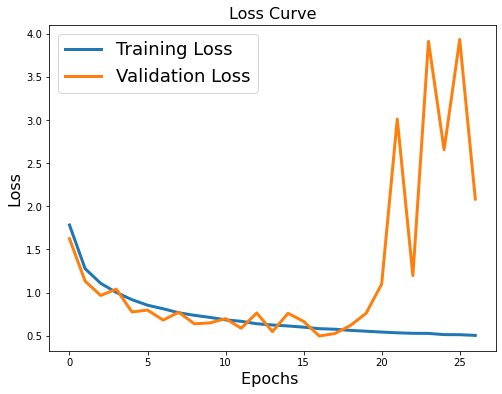

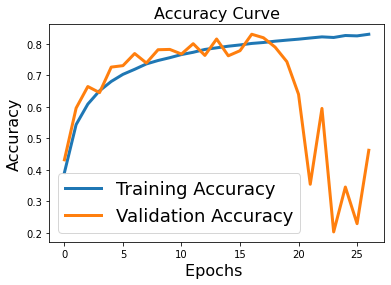

In [46]:
plt.figure(figsize=[8,6])
#Loss Curve
plt.plot(history.history["loss"],linewidth=3.0)
plt.plot(history.history["val_loss"],linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curve',fontsize=16)
plt.show()
#Accuracy Curve
plt.plot(history.history["accuracy"],linewidth=3.0)
plt.plot(history.history["val_accuracy"],linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curve',fontsize=16)
plt.show()

## Saving to csv file

In [28]:
df=pd.DataFrame(predictions)
df.to_csv('Y_pred.csv', index=False,header=False)